In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.animation import FuncAnimation
from matplotlib import animation

In [2]:
coords = pd.read_csv('../data/m3v1mp4croppedDLC_resnet50_RobertTestOct3shuffle1_1030000.csv')

In [3]:
coords.columns = (coords.iloc[0,:]+' '+coords.iloc[1,:]).values
coords = coords.drop([0,1])
coords = coords.drop(['bodyparts coords'],axis=1).astype(float)
coords = coords.reset_index(drop=True)
coords.head()

,nose x,nose y,nose likelihood,leftear x,leftear y,leftear likelihood,rightear x,rightear y,rightear likelihood,tailbase x,tailbase y,tailbase likelihood,tailend x,tailend y,tailend likelihood
0,78.335678,89.506699,1.0,75.041306,111.994080,1.000000,89.728401,99.431908,1.0,139.859894,181.721725,1.0,230.203568,272.085205,1.0
1,76.976311,87.213768,1.0,73.677399,109.938629,0.999998,88.505699,96.650795,1.0,140.105591,179.165100,1.0,232.070480,262.988495,1.0
2,75.606316,84.520607,1.0,72.914787,106.394951,0.999998,87.137726,92.581650,1.0,142.159286,176.610245,1.0,239.198853,257.370911,1.0
3,74.633263,81.613541,1.0,71.869522,102.644188,1.000000,87.047920,89.346596,1.0,144.093475,173.126770,1.0,244.149536,246.655136,1.0
4,73.961731,78.736244,1.0,71.657982,99.242676,1.000000,86.505821,87.510986,1.0,147.480423,169.337555,1.0,246.682159,241.076477,1.0


In [4]:
num_limbs = int(coords.shape[1]/3)
drop_cols = []

In [5]:
coords = coords.drop(coords.columns[np.linspace(1,num_limbs,num_limbs,dtype=int)*3-1],axis=1)

In [6]:
coords.head()

,nose x,nose y,leftear x,leftear y,rightear x,rightear y,tailbase x,tailbase y,tailend x,tailend y
0,78.335678,89.506699,75.041306,111.994080,89.728401,99.431908,139.859894,181.721725,230.203568,272.085205
1,76.976311,87.213768,73.677399,109.938629,88.505699,96.650795,140.105591,179.165100,232.070480,262.988495
2,75.606316,84.520607,72.914787,106.394951,87.137726,92.581650,142.159286,176.610245,239.198853,257.370911
3,74.633263,81.613541,71.869522,102.644188,87.047920,89.346596,144.093475,173.126770,244.149536,246.655136
4,73.961731,78.736244,71.657982,99.242676,86.505821,87.510986,147.480423,169.337555,246.682159,241.076477


In [7]:
limbs = [l.rstrip(" y") for l in coords.columns[np.linspace(1,num_limbs,num_limbs,dtype=int)*2-1]]
limbs

['nose', 'leftear', 'rightear', 'tailbase', 'tailend']

In [8]:
center_limb = 3
align_limb = 0

In [9]:
[limbs[center_limb] +" x",limbs[center_limb] +" y"]

['tailbase x', 'tailbase y']

In [10]:
def center_and_rotate_coords(coords,center,angle):
    align_coords = coords-center
    rotate_coords = align_coords.copy()
    rotate_coords[0] = math.cos(angle)*align_coords[0] - \
                       math.sin(angle)*align_coords[1]

    rotate_coords[1] = math.sin(angle)*align_coords[0] + \
                       math.cos(angle)*align_coords[1] 
    return rotate_coords

In [11]:
translated_coords = coords.copy()
center_cols = [limbs[center_limb] +" x",limbs[center_limb] +" y"]
align_cols = [limbs[align_limb] +" x",limbs[align_limb] +" y"]
for i,r in coords.iterrows():
    center = coords.loc[i,center_cols].values
    align = coords.loc[i,align_cols].values
    align0 = align-center
    angle = -np.arctan2(align0[1],align0[0])
    for l in limbs:
        cols = [l+" x",l+" y"]
        translated_coords.loc[i,cols] = center_and_rotate_coords(coords.loc[i,cols].values,center,angle)
        #print(f"{i} {l}: {translated_coords.loc[i,cols]}")

In [12]:
coords.shape

(2330, 10)

In [13]:
help(FuncAnimation)

Help on class FuncAnimation in module matplotlib.animation:

class FuncAnimation(TimedAnimation)
 |  FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, *, cache_frame_data=True, **kwargs)
 |  
 |  Makes an animation by repeatedly calling a function *func*.
 |  
 |  .. note::
 |  
 |      You must store the created Animation in a variable that lives as long
 |      as the animation should run. Otherwise, the Animation object will be
 |      garbage-collected and the animation stops.
 |  
 |  Parameters
 |  ----------
 |  fig : `~matplotlib.figure.Figure`
 |      The figure object used to get needed events, such as draw or resize.
 |  
 |  func : callable
 |      The function to call at each frame.  The first argument will
 |      be the next value in *frames*.   Any additional positional
 |      arguments can be supplied via the *fargs* parameter.
 |  
 |      The required signature is::
 |  
 |          def func(frame, *fargs) -> iterable_of_artists
 |  

In [14]:
def animate(frame_num):
    x=[]
    y=[]
    for l in limbs:
        cols = [l+" x",l+" y"]
        coord = translated_coords.loc[frame_num,cols]
        x.append(coord[0])
        y.append(coord[1])
    sc.set_offsets(np.c_[x,y])

<IPython.core.display.Javascript object>


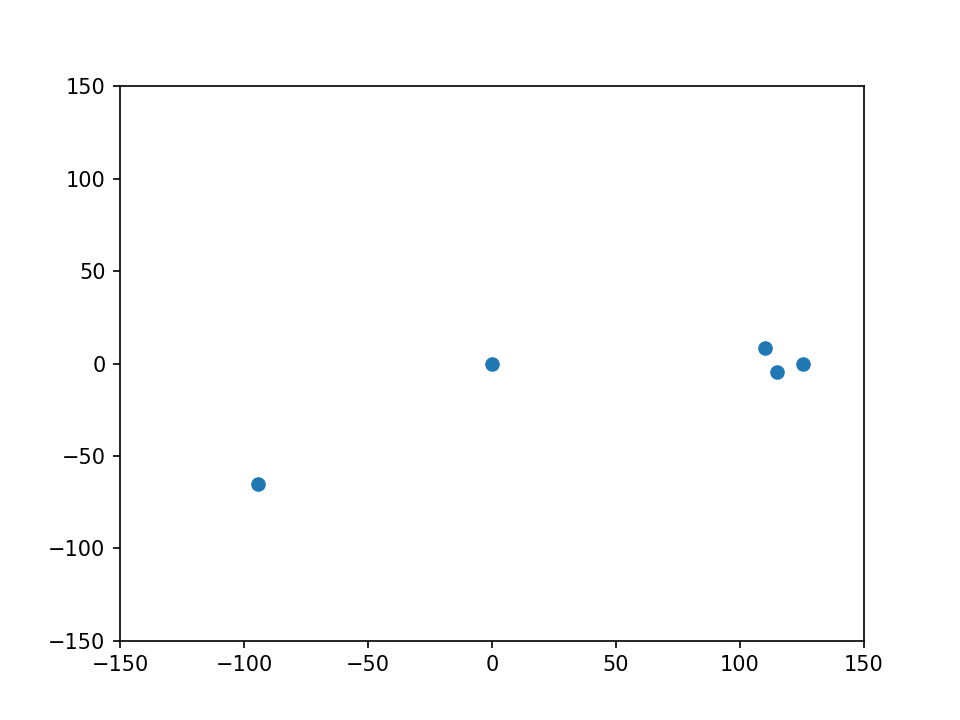

In [15]:
%matplotlib notebook


fig, ax = plt.subplots()
sc = ax.scatter([],[])

ax.set_xlim(-150,150)
ax.set_ylim(-150,150)


ani = FuncAnimation(fig, animate, frames=coords.shape[0], 
                    interval=100, repeat=False)
plt.show()

In [182]:
f = r"alignedcoords.gif" 
writergif = animation.PillowWriter(fps=30) 
ani.save(f, writer=writergif)

# Clustering poses

In [16]:
import sklearn.cluster
from sklearn.decomposition import PCA
from sklearn import preprocessing
import hdbscan
from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [17]:
translated_coords.head()

,nose x,nose y,leftear x,leftear y,rightear x,rightear y,tailbase x,tailbase y,tailend x,tailend y
0,110.855042,-7.105427e-15,93.977228,-15.220861,96.275806,3.968602,-0.0,0.0,-125.309541,25.001137
1,111.536333,-7.105427e-15,94.668974,-15.581860,97.230777,4.163575,-0.0,0.0,-121.156486,28.372670
2,113.621298,1.421085e-14,97.468770,-14.994235,100.333401,4.624459,-0.0,0.0,-122.296543,31.345147
3,114.888608,-7.105427e-15,99.807805,-14.916292,101.223184,5.213448,-0.0,0.0,-119.060834,35.244202
4,116.677314,1.421085e-14,102.205426,-14.710047,101.959558,4.211645,-0.0,0.0,-118.213403,31.828429


In [18]:
data = translated_coords.values
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)
#data = preprocessing.scale(data)
data.sum(axis=0)

array([-1.76214598e-12, -4.61852778e-14, -5.68434189e-13,  6.11066753e-13,
        5.40012479e-13,  1.84741111e-13,  0.00000000e+00,  0.00000000e+00,
       -1.02318154e-12, -4.26325641e-14])

In [19]:
pca = PCA(n_components=data.shape[1])
pca.fit(data)
embedding = pca.transform(data)[:,:]

<IPython.core.display.Javascript object>


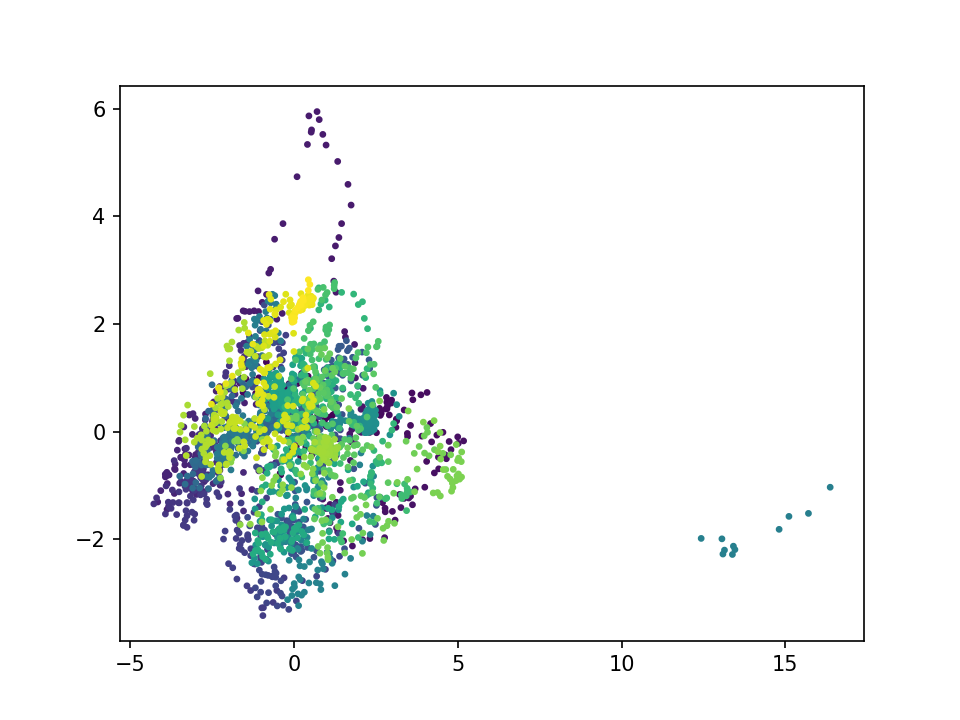

In [20]:
fig, ax = plt.subplots()
c = np.array(range(data.shape[0]))
c = c/max(c)
plt.scatter(*embedding[:,[0,1]].transpose(),c=c,s=5)
plt.show()

In [21]:
clusterer=hdbscan.HDBSCAN(min_cluster_size=20)
clusterer.fit(embedding[:,[0,1]])
color_palette = sns.color_palette('hls', (np.max(clusterer.labels_+1)))
cluster_colors = [color_palette[x] if x>= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                        zip(cluster_colors, clusterer.probabilities_)]
cluster_member_colors_hex=['#%02x%02x%02x' %tuple(int(c*256) for c in l) for l in cluster_member_colors]
colors = cluster_member_colors_hex

In [22]:
linkages = ("ward", "average", "complete", "single")

clusterer = AgglomerativeClustering(linkage=linkages[0], n_clusters=6)
clusterer.fit(embedding[:,[0,1]])
color_palette = sns.color_palette('hls', (np.max(clusterer.labels_+1)))
cluster_member_colors = [color_palette[x] if x>= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors_hex=['#%02x%02x%02x' %tuple(int(c*256) for c in l) for l in cluster_member_colors]
colors = cluster_member_colors_hex

<IPython.core.display.Javascript object>


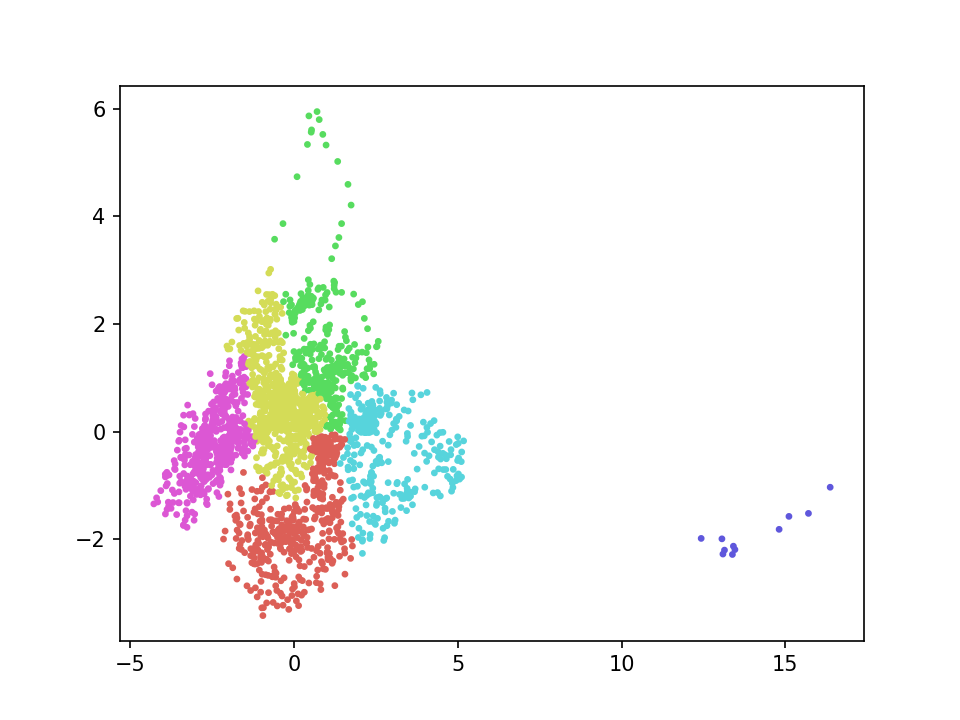

In [23]:
fig, ax = plt.subplots()
c = np.array(range(data.shape[0]))
c = c/max(c)
plt.scatter(*embedding[:,[0,1]].transpose(),c=colors,s=5)

In [24]:
def visualize_cluster(cluster_ind):
    cluster_points = data[clusterer.labels_==cluster_ind,:]
    cluster_average = cluster_points.mean(axis=0)
    cluster_average = scaler.inverse_transform([cluster_average])

    cluster_coords = np.zeros((int(cluster_average[0].shape[0]/2),2))
    for i in range(int(cluster_average[0].shape[0]/2)):
        cluster_coords[i,0]=cluster_average[0][2*i]
        cluster_coords[i,1]=cluster_average[0][2*i+1]
    return cluster_coords

In [25]:
int(math.ceil((np.max(clusterer.labels_)+1)/2))

3

<IPython.core.display.Javascript object>


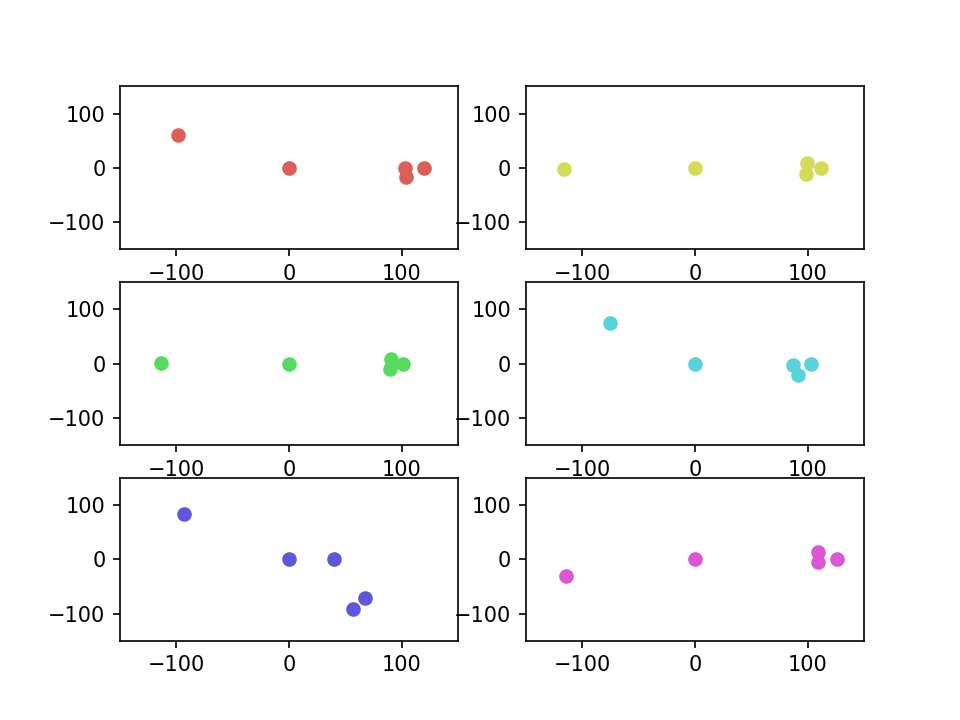

In [26]:
fig, ax = plt.subplots(int(math.ceil((np.max(clusterer.labels_)+1)/2)),2)

for i in range(np.max(clusterer.labels_)+1):
    cluster_coords = visualize_cluster(i)
    ax[i//2,i%2].scatter(*cluster_coords.transpose(),color=color_palette[i])
    ax[i//2,i%2].set_xlim(-150,150)
    ax[i//2,i%2].set_ylim(-150,150)

plt.show()

In [166]:
3%2

1

# testing

In [184]:
center_cols = [limbs[center_limb] +" x",limbs[center_limb] +" y"]
align_cols = [limbs[align_limb] +" x",limbs[align_limb] +" y"]
center = coords.loc[i,center_cols].values
align = coords.loc[i,align_cols].values
align0 = align-center
angle = -np.arctan2(align0[1],align0[0])
rotate0 = align0.copy()

rotate0[0] = math.cos(angle)*align0[0] - \
            math.sin(angle)*align0[1]

rotate0[1] = math.sin(angle)*align0[0] + \
            math.cos(angle)*align0[1]


align_coords = translated_coords.loc[i,cols].values-center
translated_coords.loc[i,cols[0]] = math.cos(angle)*align_coords[0] - \
                                   math.sin(angle)*align_coords[1]
    
translated_coords.loc[i,cols[1]] = math.sin(angle)*align_coords[0] + \
                                   math.cos(angle)*align_coords[1]   



(31.721725463867188, 331.7217254638672)

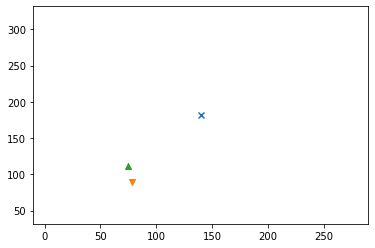

In [188]:
f = plt.figure()
ax = plt.subplot()
ax.scatter(*center,marker='x')
ax.scatter(*align,marker='v')
ax.scatter(*coords.loc[i,cols],marker='^')

plt.xlim(center[0]-150,center[0]+150)
plt.ylim(center[1]-150,center[1]+150)

(-250.0, 250.0)

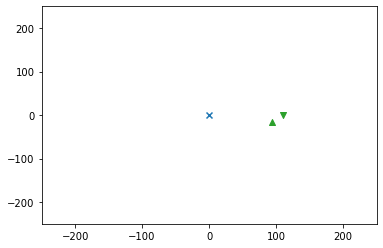

In [190]:
#plt.scatter(center[0],center[1])
f = plt.figure()
ax = plt.subplot()
ax.scatter(0,0,marker='x')
ax.scatter(*rotate0,marker='v',c='#2ca02c')
ax.scatter(*translated_coords.loc[i,cols].values,marker='^',c='#2ca02c')

plt.xlim(-250,250)
plt.ylim(-250,250)